In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
# 來看看 mnist 的型態
print type(mnist)
print mnist.train.num_examples
print mnist.validation.num_examples
print mnist.test.num_examples

print("讓我們看一下 MNIST 訓練還有測試的資料集長得如何")
train_img = mnist.train.images
train_label = mnist.train.labels
test_img = mnist.test.images
test_label = mnist.test.labels
print
print(" train_img 的 type : %s" % (type(train_img)))
print(" train_img 的 dimension : %s" % (train_img.shape,))
print(" train_label 的 type : %s" % (type(train_label)))
print(" train_label 的 dimension : %s" % (train_label.shape,))
print(" test_img 的 type : %s" % (type(test_img)))
print(" test_img 的 dimension : %s" % (test_img.shape,))
print(" test_label 的 type : %s" % (type(test_label)))
print(" test_label 的 dimension : %s" % (test_label.shape,))

<class 'tensorflow.contrib.learn.python.learn.datasets.base.Datasets'>
55000
5000
10000
讓我們看一下 MNIST 訓練還有測試的資料集長得如何

 train_img 的 type : <type 'numpy.ndarray'>
 train_img 的 dimension : (55000, 784)
 train_label 的 type : <type 'numpy.ndarray'>
 train_label 的 dimension : (55000, 10)
 test_img 的 type : <type 'numpy.ndarray'>
 test_img 的 dimension : (10000, 784)
 test_label 的 type : <type 'numpy.ndarray'>
 test_label 的 dimension : (10000, 10)


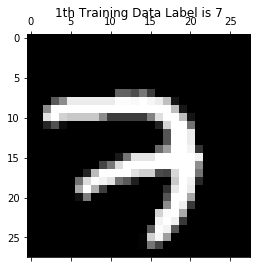

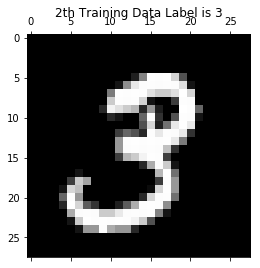

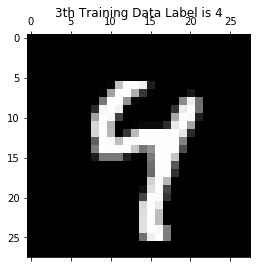

In [4]:
trainimg = mnist.train.images
trainlabel = mnist.train.labels
nsample = 1
randidx = np.random.randint(trainimg.shape[0], size=nsample)

for i in [0, 1, 2]:
    curr_img   = np.reshape(trainimg[i, :], (28, 28)) # 28 by 28 matrix 
    curr_label = np.argmax(trainlabel[i, :] ) # Label
    plt.matshow(curr_img, cmap=plt.get_cmap('gray'))
    plt.title("" + str(i + 1) + "th Training Data " 
              + "Label is " + str(curr_label))

In [14]:
import tensorflow as tf

learning_rate = 0.5
x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
y = tf.nn.softmax(tf.matmul(x, W) + b)
y_ = tf.placeholder(tf.float32, [None, 10])


cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y, labels=y_))
#cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))


train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy)
init = tf.global_variables_initializer()

sess = tf.Session()

sess.run(init)

for i in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict = {x: batch_xs, y_: batch_ys})
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

0.9073


In [21]:
print(sess.run(y[0,:], feed_dict = {x: mnist.test.images, y_: mnist.test.labels}))

[  2.54741917e-06   7.98156985e-10   8.76245906e-07   2.02245101e-05
   1.06550367e-07   1.61126638e-06   1.13499254e-08   9.99913573e-01
   1.58945704e-06   5.93222903e-05]
